In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import h5py
with h5py.File("/home/garywu/summer_2025/LRF/npy files/LRF_output_sst_2.5K.dat", "r") as f:
    LRF_SW_q = f["LRF_SW_q"][:]
    LRF_LW_q = f["LRF_LW_q"][:]
    # LRF_SW_T = f["LRF_SW_T"][:]
    # LRF_LW_T = f["LRF_LW_T"][:]
    LW_ref = f["ref_heating_LW"][:]
    SW_ref = f["ref_heating_SW"][:]
    ref_T = f["ref_T"][:]
    ref_q = f["ref_q"][:]

p = np.load("/data92/garywu/2025_summer/dycore/npy_files/ctrl_p_mean.npy") / 100

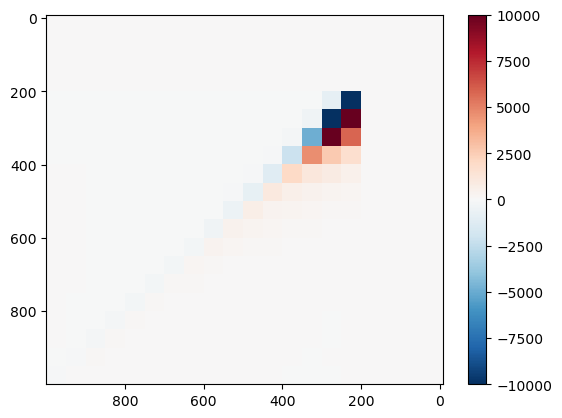

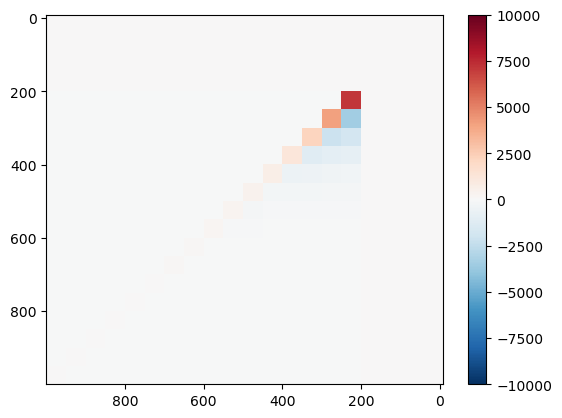

In [5]:
mesh = plt.pcolormesh(p, p, LRF_LW_q[32], vmin=-10000, vmax=10000, cmap='RdBu_r')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar(mesh)
plt.show()

mesh = plt.pcolormesh(p, p, LRF_SW_q[32], vmin=-10000, vmax=10000, cmap='RdBu_r')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar(mesh)

In [10]:
def reconstruct_with_truncated_eigs_real(A, k):
    """
    Reconstruct A using only the top k eigenmodes (by |Re(eigenvalue)|),
    but for reconstruction use the full (possibly complex) eigenvalues.

    Parameters
    ----------
    A : (n, n) ndarray
        The square matrix to decompose.
    k : int
        Number of modes to retain.

    Returns
    -------
    A_rec : (n, n) ndarray
        The (optionally real‐cast) reconstruction with only k nonzero eigenvalues.
    """
    eigvals_full, eigvecs = np.linalg.eig(A)

    # 2) Extract real parts for sorting
    real_parts = eigvals_full.real

    print(eigvals_full)
    print(real_parts)
    # 3) Sort indices by descending |Re(eigenvalue)|
    idx = np.argsort(np.abs(real_parts))[::-1]
    eigvals_sorted = eigvals_full[idx]
    eigvecs_sorted = eigvecs[:, idx]

    # 4) Truncate: keep top k eigenvalues, zero out the rest
    eigvals_trunc = np.zeros_like(eigvals_sorted, dtype=eigvals_sorted.dtype)
    eigvals_trunc[k] = eigvals_sorted[k]

    # 5) Reconstruct using the full (complex) eigenvalues
    A_rec = eigvecs_sorted @ np.diag(eigvals_trunc) @ np.linalg.inv(eigvecs_sorted)

    # 6) Drop tiny imaginary parts from round‐off
    # return np.real_if_close(A_rec, tol=1e-8)
    return A_rec

[7030.24914948 3806.10093306 2101.55612904 1183.66972954  679.72477771
  413.45341473  264.3700878   182.23519882  133.30206278   98.57394699
   74.74674829   26.61714191   35.37927729   40.43923935   48.16114133
   59.0263561     0.            0.            0.            0.        ]
[7030.24914948 3806.10093306 2101.55612904 1183.66972954  679.72477771
  413.45341473  264.3700878   182.23519882  133.30206278   98.57394699
   74.74674829   26.61714191   35.37927729   40.43923935   48.16114133
   59.0263561     0.            0.            0.            0.        ]


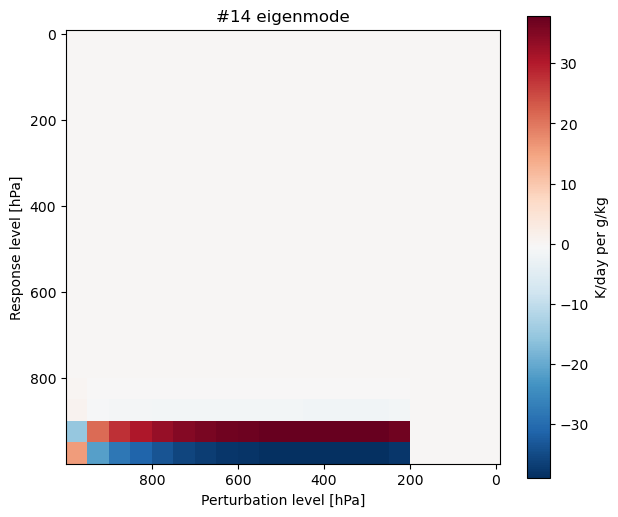

In [24]:
k = 14
kernel_total = LRF_SW_q[32]
kernel_recon = reconstruct_with_truncated_eigs_real(kernel_total, k=k)

plt.figure(figsize=(7,6))
cs1 = plt.pcolormesh(p, p, kernel_recon.real, cmap='RdBu_r')
plt.gca().invert_yaxis(); plt.gca().invert_xaxis()
plt.gca().set_aspect('equal')
plt.xlabel('Perturbation level [hPa]')
plt.ylabel('Response level [hPa]')
plt.title(f'#{k} eigenmode')
plt.colorbar(cs1, label='K/day per g/kg')